1970년대 보스턴 지역의 주택가격 예측 -> 회귀

데이터 준비하기

In [1]:
from tensorflow.keras.datasets.boston_housing import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)


데이터 형태 확인하기

In [2]:
# 훈련 데이터
print(x_train.shape, y_train.shape)

# 테스트 데이터
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


데이터 전처리 및 검증 데이터 셋 만들기

In [3]:
import numpy as np
np.set_printoptions(suppress=True)

print(x_train[0])

# 스케일링
# 각각의 데이터의 크기가 제각각으로 차이가 크므로 표준편차(Standardization)를 이용해 나눠주어 그 차이를 줄여준다.


[  0.25199   0.       10.59      0.        0.489     5.783    72.7
   4.3549    4.      277.       18.6     389.43     18.06   ]


In [4]:
# 데이터 전처리 -> 표준화 하기(std)

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

# 데이터(훈련, 테스트 데이터 모두) - 평균 / 표준편차(Standardization)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

print(x_train[0])


[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


In [5]:
# 검증 데이터 셋 만들기

from sklearn.model_selection import train_test_split

# 훈련 검증 데이터를 7:3 비율로 분리하기
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size = 0.33,
                                                  random_state =777)

In [6]:
print(x_train.shape, x_val.shape)

(270, 13) (134, 13)


모델 구성하기

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


모델 설정하기

In [8]:
model.compile(optimizer='adam', loss='mse', metrics = ['mae', 'mse'])

# mse 는 제곱을 했으므로 집값을 알 수 없지만 
# mae 는 절대값을 씌운 것이기 때문에 집값을 알 수 있다.

모델 학습하기

In [9]:
history = model.fit(x_train,
                    y_train,
                    epochs = 300,
                    validation_data = (x_val, y_val))


Epoch 1/300
9/9 [==============================] - 14s 66ms/step - loss: 520.2639 - mae: 21.3178 - mse: 520.2639 - val_loss: 603.2297 - val_mae: 22.3615 - val_mse: 603.2297
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 518.7179 - mae: 21.2336 - mse: 518.7179 - val_loss: 569.0281 - val_mae: 21.6190 - val_mse: 569.0281
Epoch 3/300
9/9 [==============================] - 0s 7ms/step - loss: 502.7700 - mae: 20.6773 - mse: 502.7700 - val_loss: 531.1813 - val_mae: 20.7785 - val_mse: 531.1813
Epoch 4/300
9/9 [==============================] - 0s 7ms/step - loss: 460.9290 - mae: 19.6032 - mse: 460.9290 - val_loss: 488.1256 - val_mae: 19.7826 - val_mse: 488.1256
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 412.2425 - mae: 18.4547 - mse: 412.2425 - val_loss: 437.8576 - val_mae: 18.5547 - val_mse: 437.8576
Epoch 6/300
9/9 [==============================] - 0s 7ms/step - loss: 378.3434 - mae: 17.6687 - mse: 378.3434 - val_loss: 379.5286 - val_mae: 

모델 그려보기

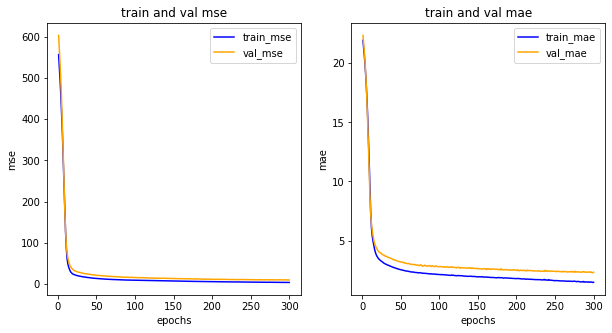

In [10]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()


모델 평가하기

In [11]:
print(model.evaluate(x_test, y_test)) 
# mae 2.0 -> 실제 집값과 2,000 달러 정도 차이 남


4/4 [==============================] - 0s 3ms/step - loss: 9.6302 - mae: 2.3132 - mse: 9.6302
[9.630223274230957, 2.3132100105285645, 9.630223274230957]


모델 예측하기

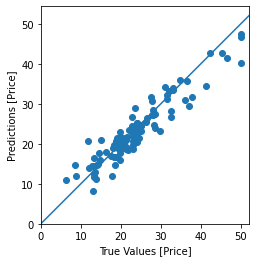

In [12]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [ ]:
# 추세선에 딱 맞추면 괜찮고 추세선 밑이면 실제 값보다 낮게 예측한 것
# 회귀는 연속적인 값을 예측해야 되기 때문에 오차율을 봐야 한다. 내가 예측한거 - 실제값
# 오차율을 따져보면 mae랑 mse를 봐야돼
# 10~30 달러는 비슷하게 예측하는데 50달러는 실제 값보다 낮게 예측했다. 50달러 이상을 제대로 이해하지 못한것이다. 좀 더 학습시켜야돼.-> 가장 싼집에 대한 데이터셋과 가장 비싼집에 대한 데이터셋을 더 모아서 학습시켜야 돼
# mae와 mse 오차값이 가장 작은 것을 선택해./ 작을수록 좋다
# mse가 크다는 것은 최적선이 잘 예측하지 못했다는 것
# mae, mse는 회귀를 쓸 때 사용함 (mean absolute error / mean squred error)

# lr이 클수록 후딱 공부하고 작을수록 세세하게 공부한다.